In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8, 
         'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16, 
         'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
         'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
         'LateAircraftDelay': np.float16, 'DepTime': np.float16}

In [3]:
%%time
# change the path if needed
path = './data/2008.csv.bz2'
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

CPU times: user 52.9 s, sys: 1.9 s, total: 54.8 s
Wall time: 56.4 s


In [4]:
print(flights_df.shape)

(7009728, 19)


In [5]:
print(flights_df.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [6]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [10]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


In [11]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
dtypes: float16(8), object(4), uint16(3), uint8(4)
memory usage: 387.7+ MB


In [12]:
flights_df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6873482.0,7.009728e+06,6855029.0,6873482.0,7.009728e+06,7.009728e+06,1524735.0,1524735.0,1524735.0,1524735.0,1524735.0
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,NaN,2.224200e+03,NaN,NaN,7.263870e+02,1.960618e-02,NaN,NaN,NaN,NaN,NaN
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,NaN,1.961716e+03,NaN,NaN,5.621018e+02,1.386426e-01,NaN,NaN,NaN,NaN,NaN
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,-519.0,-534.0,1.100000e+01,0.000000e+00,0.0,0.0,0.0,0.0,0.0
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,928.0,6.220000e+02,-10.0,-4.0,3.250000e+02,0.000000e+00,0.0,0.0,0.0,0.0,0.0
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1325.0,1.571000e+03,-2.0,-1.0,5.810000e+02,0.000000e+00,0.0,0.0,6.0,0.0,0.0
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1728.0,3.518000e+03,12.0,8.0,9.540000e+02,0.000000e+00,16.0,0.0,21.0,0.0,26.0
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2400.0,9.743000e+03,2460.0,2468.0,4.962000e+03,1.000000e+00,2436.0,1352.0,1357.0,392.0,1316.0


In [13]:
flights_df['UniqueCarrier'].nunique()

20

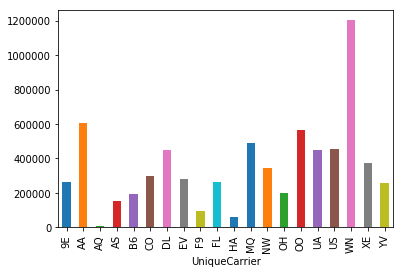

In [16]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar')